In [30]:
%reload_ext autoreload
%autoreload 2

# Install packages

In [50]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Initial Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from preprocess import Preprocess, download_data, split_train_test
from classifier import Classifiers

In [3]:
config_path = "./config.json"
with open(config_path, "r") as file:
    config = json.load(file)

raw_df = download_data(config, n_rows=None)
X_train, X_test, y_train, y_test = split_train_test(raw_df, config)


In [7]:
preprocess = Preprocess(config, X_train)
classify = Classifiers(config)
preprocess.generate_raw_data_info(raw_df, "full")

# Pipelines

## Base Pipeline

In [8]:
baseline_pipeline = preprocess.gen_basic_pipeline()
baseline_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('scaling', StandardScaler())])

In [11]:
preprocess_pipelines = {"baseline": baseline_pipeline}
k_fold_eval, agg_eval = classify.fit_and_eval(preprocess_pipelines, X_train, y_train)

Training 5 models for baseline: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [01:52<00:22, 22.63s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [12]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1103 ±(0.0023),0.0164 ±(0.0039),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
5,baseline,DT,0.1145 ±(0.0061),0.0172 ±(0.0043),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,baseline,LR,0.0930 ±(0.0182),0.0144 ±(0.0014),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
6,baseline,LR,0.0997 ±(0.0260),0.0185 ±(0.0206),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
2,baseline,NN,6.0566 ±(0.2924),0.0163 ±(0.0020),0.9008 ±(0.0124),0.9563 ±(0.0058),0.5625 ±(0.0822),0.8397 ±(0.0726),0.5049 ±(0.1005),0.7529 ±(0.1011),0.5309 ±(0.0364),0.7932 ±(0.0364)
7,baseline,NN,6.4386 ±(0.6701),0.0181 ±(0.0060),0.9019 ±(0.0075),0.9574 ±(0.0024),0.5645 ±(0.0409),0.8401 ±(0.0258),0.5215 ±(0.0542),0.7634 ±(0.0571),0.5420 ±(0.0362),0.7997 ±(0.0206)
3,baseline,RF,0.6257 ±(0.0420),0.0300 ±(0.0031),0.9038 ±(0.0075),0.9054 ±(0.0025),0.7913 ±(0.1185),0.8182 ±(0.0368),0.1843 ±(0.0577),0.1936 ±(0.0279),0.2987 ±(0.0817),0.3130 ±(0.0363)
8,baseline,RF,0.6735 ±(0.0666),0.0297 ±(0.0012),0.9039 ±(0.0069),0.9050 ±(0.0025),0.8074 ±(0.1079),0.8220 ±(0.0286),0.1797 ±(0.0669),0.1870 ±(0.0251),0.2933 ±(0.0929),0.3046 ±(0.0336)
4,baseline,SVC,6.2213 ±(0.0262),3.1468 ±(0.1273),0.9089 ±(0.0076),0.9300 ±(0.0019),0.6529 ±(0.0483),0.8000 ±(0.0132),0.3879 ±(0.0649),0.4957 ±(0.0198),0.4865 ±(0.0613),0.6121 ±(0.0150)
9,baseline,SVC,6.2232 ±(0.1302),3.0342 ±(0.1080),0.9089 ±(0.0076),0.9300 ±(0.0019),0.6529 ±(0.0483),0.8000 ±(0.0132),0.3879 ±(0.0649),0.4957 ±(0.0198),0.4865 ±(0.0613),0.6121 ±(0.0150)


## Binning Features Pipleline

In [13]:
bin_pipeline = preprocess.gen_pipeline_with_age_pdays_binned()
bin_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler())])

In [14]:
preprocess_pipelines = {"bin_features": bin_pipeline}
k_fold_eval, agg_eval = classify.fit_and_eval(preprocess_pipelines, X_train, y_train)

Training 5 models for bin_features: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [01:47<00:21, 21.53s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [16]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1103 ±(0.0023),0.0164 ±(0.0039),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,baseline,DT,0.1145 ±(0.0061),0.0172 ±(0.0043),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
10,bin_features,DT,0.1224 ±(0.0053),0.0194 ±(0.0007),0.9126 ±(0.0116),0.9188 ±(0.0035),0.6454 ±(0.0648),0.6825 ±(0.0487),0.4771 ±(0.1037),0.5080 ±(0.0625),0.5482 ±(0.0797),0.5821 ±(0.0284)
2,baseline,LR,0.0930 ±(0.0182),0.0144 ±(0.0014),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
3,baseline,LR,0.0997 ±(0.0260),0.0185 ±(0.0206),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
11,bin_features,LR,0.1261 ±(0.0404),0.0179 ±(0.0044),0.9124 ±(0.0106),0.9131 ±(0.0016),0.6643 ±(0.0740),0.6689 ±(0.0085),0.4318 ±(0.0548),0.4350 ±(0.0130),0.5233 ±(0.0595),0.5272 ±(0.0118)
4,baseline,NN,6.0566 ±(0.2924),0.0163 ±(0.0020),0.9008 ±(0.0124),0.9563 ±(0.0058),0.5625 ±(0.0822),0.8397 ±(0.0726),0.5049 ±(0.1005),0.7529 ±(0.1011),0.5309 ±(0.0364),0.7932 ±(0.0364)
5,baseline,NN,6.4386 ±(0.6701),0.0181 ±(0.0060),0.9019 ±(0.0075),0.9574 ±(0.0024),0.5645 ±(0.0409),0.8401 ±(0.0258),0.5215 ±(0.0542),0.7634 ±(0.0571),0.5420 ±(0.0362),0.7997 ±(0.0206)
12,bin_features,NN,5.8083 ±(0.3920),0.0201 ±(0.0053),0.8979 ±(0.0116),0.9676 ±(0.0028),0.5456 ±(0.0608),0.8861 ±(0.0389),0.5060 ±(0.0744),0.8139 ±(0.0646),0.5246 ±(0.0464),0.8482 ±(0.0198)
6,baseline,RF,0.6257 ±(0.0420),0.0300 ±(0.0031),0.9038 ±(0.0075),0.9054 ±(0.0025),0.7913 ±(0.1185),0.8182 ±(0.0368),0.1843 ±(0.0577),0.1936 ±(0.0279),0.2987 ±(0.0817),0.3130 ±(0.0363)


In [28]:
# sample of data after transformation
_data = bin_pipeline.fit_transform(X_train, y_train)
transformed_columns = bin_pipeline.get_feature_names_out()
pd.set_option('display.max_columns', None)
pd.DataFrame(_data, columns=transformed_columns).head()

,cat_features__job_admin.,cat_features__job_blue-collar,cat_features__job_entrepreneur,cat_features__job_housemaid,cat_features__job_management,cat_features__job_retired,cat_features__job_self-employed,cat_features__job_services,cat_features__job_student,cat_features__job_technician,cat_features__job_unemployed,cat_features__marital_divorced,cat_features__marital_married,cat_features__marital_single,cat_features__education_basic.4y,cat_features__education_basic.6y,cat_features__education_basic.9y,cat_features__education_high.school,cat_features__education_illiterate,cat_features__education_professional.course,cat_features__education_university.degree,cat_features__default_no,cat_features__default_yes,cat_features__housing_no,cat_features__housing_yes,cat_features__loan_no,cat_features__loan_yes,cat_features__contact_cellular,cat_features__contact_telephone,cat_features__month_apr,cat_features__month_aug,cat_features__month_dec,cat_features__month_jul,cat_features__month_jun,cat_features__month_mar,cat_features__month_may,cat_features__month_nov,cat_features__month_oct,cat_features__month_sep,cat_features__day_of_week_fri,cat_features__day_of_week_mon,cat_features__day_of_week_thu,cat_features__day_of_week_tue,cat_features__day_of_week_wed,cat_features__poutcome_failure,cat_features__poutcome_nonexistent,cat_features__poutcome_success,cont_features__duration,cont_features__campaign,cont_features__previous,cont_features__emp.var.rate,cont_features__cons.price.idx,cont_features__cons.conf.idx,cont_features__euribor3m,cont_features__nr.employed,age__age__17_23,age__age__24_30,age__age__31_38,age__age__39_45,age__age__46_52,age__age__53_60,age__age__61_67,age__age__68_74,age__age__75_82,age__age__83_89,age__age__90_97,pdays__pdays_0_7,pdays__pdays_8_16,pdays__pdays_17_25,pdays__pdays_gt_25,pdays__pdays_never_contacted
0,-0.593853,-0.540856,5.296000,-0.164512,-0.277993,-0.208712,-0.185433,-0.327285,-0.145512,-0.442955,-0.156654,-0.356319,0.805848,-0.625244,-0.33692,4.108861,-0.41492,-0.548072,-0.02062,-0.382175,-0.711991,0.009544,-0.009544,-0.904978,0.904978,-2.353085,2.353085,-1.316322,1.316322,-0.260083,-0.418983,-0.067181,2.175244,-0.386182,-0.116756,-0.707252,-0.333108,-0.133996,-0.119922,2.070175,-0.509186,-0.514712,-0.495299,-0.497627,-0.337924,0.396498,-0.185783,0.112453,0.152155,-0.348601,0.838815,0.589534,-0.470932,0.771196,0.843413,-0.163242,1.999241,-0.689500,-0.482382,-0.409173,-0.331475,-0.090739,-0.079909,-0.065566,-0.038598,-0.014579,-0.173352,-0.08513,-0.021344,-0.007792,0.195698
1,1.683919,-0.540856,-0.188822,-0.164512,-0.277993,-0.208712,-0.185433,-0.327285,-0.145512,-0.442955,-0.156654,-0.356319,-1.240928,1.599376,-0.33692,-0.243376,-0.41492,-0.548072,-0.02062,-0.382175,1.404513,0.009544,-0.009544,1.104999,-1.104999,0.424974,-0.424974,-1.316322,1.316322,-0.260083,-0.418983,-0.067181,-0.459719,2.589452,-0.116756,-0.707252,-0.333108,-0.133996,-0.119922,-0.483051,-0.509186,-0.514712,-0.495299,2.009537,-0.337924,0.396498,-0.185783,-0.305973,1.229538,-0.348601,0.838815,1.534740,-0.276368,0.716413,0.843413,-0.163242,-0.500190,-0.689500,-0.482382,2.443953,-0.331475,-0.090739,-0.079909,-0.065566,-0.038598,-0.014579,-0.173352,-0.08513,-0.021344,-0.007792,0.195698
2,1.683919,-0.540856,-0.188822,-0.164512,-0.277993,-0.208712,-0.185433,-0.327285,-0.145512,-0.442955,-0.156654,-0.356319,-1.240928,1.599376,-0.33692,-0.243376,-0.41492,-0.548072,-0.02062,-0.382175,1.404513,0.009544,-0.009544,1.104999,-1.104999,0.424974,-0.424974,0.759693,-0.759693,-0.260083,2.386731,-0.067181,-0.459719,-0.386182,-0.116756,-0.707252,-0.333108,-0.133996,-0.119922,-0.483051,-0.509186,-0.514712,2.018981,-0.497627,-0.337924,0.396498,-0.185783,-0.596546,0.511282,-0.348601,0.838815,-0.229530,0.955866,0.773502,0.843413,-0.163242,1.999241,-0.689500,-0.482382,-0.409173,-0.331475,-0.090739,-0.079909,-0.065566,-0.038598,-0.014579,-0.173352,-0.08513,-0.021344,-0.007792,0.195698
3,1.683919,-0.540856,-0.188822,-0.164512,-0.277993,-0.208712,-0.185433,-0.327285,-0

## EDA and pipeline for Dropping features

### Finding features with zero variance

In [8]:
zero_variance_features = [col for col in X_train.columns if X_train[col].nunique() == 1]
zero_variance_features

[]

### Finding features with high feature to feature correlation

In [9]:
_x_train = X_train[preprocess.continuous_features].copy()
_x_train['y'] = y_train
correlation_matrix = _x_train.corr()

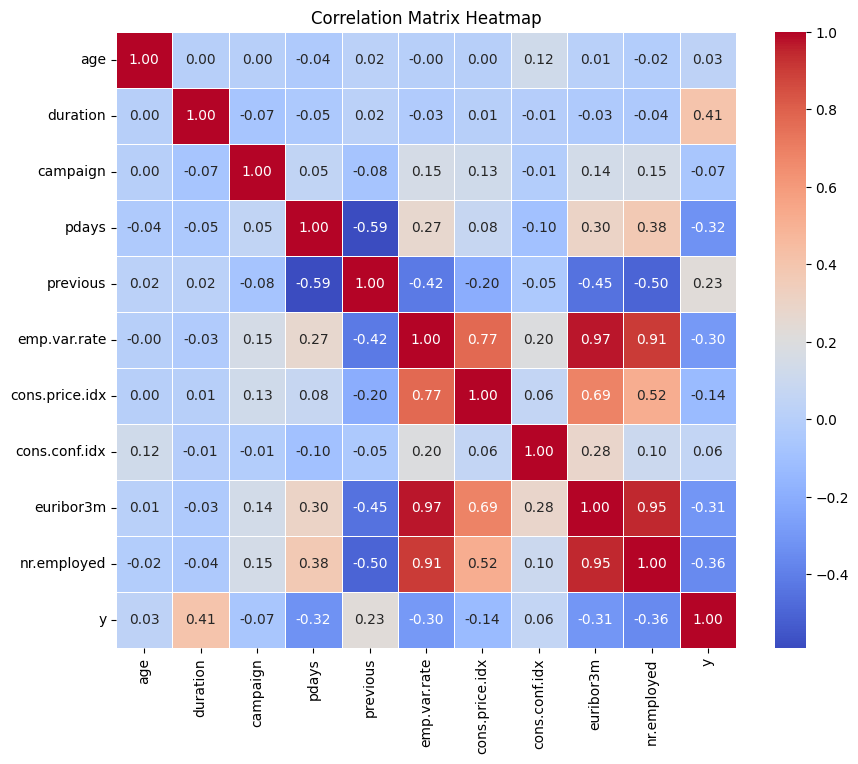

In [10]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- emp.var.rate and euribor3m have high correlation of 0.97.
- euribor3m and nr.employed have high correlation of 0.95.
- nr.employed and emp.var.rate have high correlation of 0.91

To address these high correlations, we need to drop two features. Based on their decreasing magnitude of correlation with the target variable (emp.var.rate, euribor3m, and nr.employed, in that order), **we will drop emp.var.rate and euribor3m**

In [11]:
feature_drop_pipeline = preprocess.gen_pipeline_with_feature_drop(['emp.var.rate', 'euribor3m'])
feature_drop_pipeline

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['emp.var.rate', 'euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'defa...
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler())])

In [12]:
k_fold_eval, agg_eval = classify.fit_and_eval({"feature_binning+droping": feature_drop_pipeline}, X_train, y_train)

Training 5 models for feature_drop: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [01:49<00:22, 22.03s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [13]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1227 ±(0.0050),0.0177 ±(0.0049),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
5,feature_drop,DT,0.1287 ±(0.0066),0.0201 ±(0.0040),0.9116 ±(0.0144),0.9181 ±(0.0044),0.6329 ±(0.0761),0.6701 ±(0.0447),0.4916 ±(0.1301),0.5217 ±(0.0668),0.5527 ±(0.0976),0.5862 ±(0.0328)
1,baseline,LR,0.0945 ±(0.0185),0.0144 ±(0.0017),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
6,feature_drop,LR,0.1052 ±(0.0152),0.0210 ±(0.0006),0.9119 ±(0.0094),0.9127 ±(0.0020),0.6628 ±(0.0631),0.6696 ±(0.0110),0.4245 ±(0.0624),0.4260 ±(0.0180),0.5174 ±(0.0611),0.5207 ±(0.0162)
2,baseline,NN,6.7460 ±(0.4526),0.0180 ±(0.0033),0.9007 ±(0.0138),0.9578 ±(0.0031),0.5613 ±(0.0819),0.8437 ±(0.0486),0.5057 ±(0.0611),0.7627 ±(0.0796),0.5315 ±(0.0390),0.8007 ±(0.0258)
7,feature_drop,NN,6.4333 ±(0.6076),0.0255 ±(0.0036),0.8976 ±(0.0099),0.9673 ±(0.0019),0.5447 ±(0.0514),0.8897 ±(0.0184),0.4921 ±(0.0314),0.8066 ±(0.0232),0.5170 ±(0.0377),0.8461 ±(0.0102)
3,baseline,RF,0.7608 ±(0.1057),0.0345 ±(0.0174),0.9034 ±(0.0052),0.9051 ±(0.0025),0.7892 ±(0.1001),0.8162 ±(0.0381),0.1808 ±(0.0405),0.1908 ±(0.0258),0.2939 ±(0.0558),0.3092 ±(0.0337)
8,feature_drop,RF,0.7022 ±(0.1358),0.0331 ±(0.0081),0.9025 ±(0.0089),0.9035 ±(0.0028),0.7549 ±(0.1417),0.7813 ±(0.0357),0.1832 ±(0.0692),0.1857 ±(0.0234),0.2945 ±(0.0982),0.3000 ±(0.0321)
4,baseline,SVC,6.4854 ±(0.4447),3.2463 ±(0.1759),0.9089 ±(0.0076),0.9300 ±(0.0019),0.6529 ±(0.0483),0.8000 ±(0.0132),0.3879 ±(0.0649),0.4957 ±(0.0198),0.4865 ±(0.0613),0.6121 ±(0.0150)
9,feature_drop,SVC,5.6829 ±(0.2857),2.9598 ±(0.2812),0.9064 ±(0.0054),0.9316 ±(0.0022),0.6402 ±(0.0385),0.8215 ±(0.0220),0.3634 ±(0.0444),0.4929 ±(0.0161),0.4635 ±(0.0423),0.6161 ±(0.0134)


## EDA and pipeline for PCA

In [29]:
# first get all the scaled features with baseline
base_preprocessed_x_train = feature_drop_pipeline.fit_transform(X_train)
# convert to dataframe
transformed_columns = feature_drop_pipeline.get_feature_names_out()
base_preprocessed_x_train_df = pd.DataFrame(base_preprocessed_x_train, columns=transformed_columns)

base_preprocessed_x_train.shape

NameError: name 'feature_drop_pipeline' is not defined

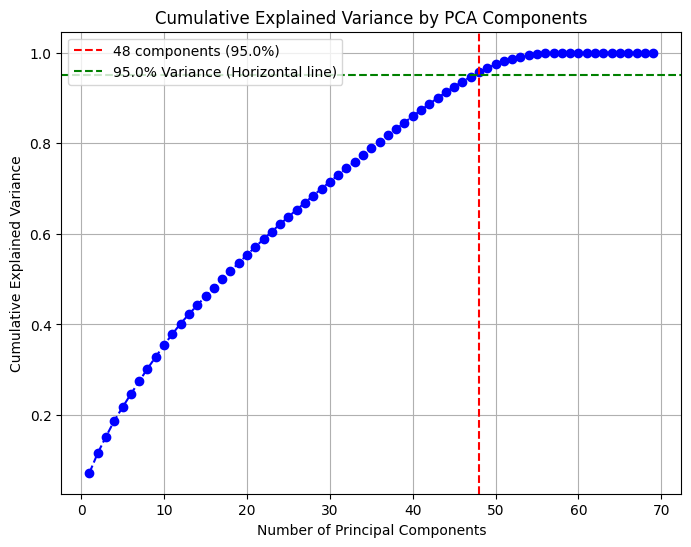

Number of components to explain 95.0% of the variance: 48


In [15]:
# Apply PCA and calculate cumulative explained variance

variance_to_keep = 0.95

pca = PCA()
pca.fit(base_preprocessed_x_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components that explain at least variance_to_keep of the variance
n_components = np.argmax(cumulative_variance >= variance_to_keep) + 1

# Plot cumulative explained variance with both vertical and horizontal variance_to_keep variance lines
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components ({variance_to_keep*100}%)')  # Vertical line
plt.axhline(y=variance_to_keep, color='g', linestyle='--', label=f'{variance_to_keep*100}% Variance (Horizontal line)')  # Horizontal line

# Plot formatting
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Output: n_components will tell you the number of components needed for variance_to_keep variance
print(f"Number of components to explain {variance_to_keep*100}% of the variance: {n_components}")

In [16]:
pca_pipeline = preprocess.gen_pipeline_with_pca(variance_to_keep, features_to_drop=['emp.var.rate', 'euribor3m'])
pca_pipeline

Pipeline(steps=[('drop_features', DropFeatures(features_to_drop=['euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing',...
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42))])

In [17]:
k_fold_eval, agg_eval = classify.fit_and_eval({"feature_binning+droping+pca": pca_pipeline}, X_train, y_train)

Training 5 models for feature_drop_pca: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [02:05<00:29, 29.90s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [18]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1227 ±(0.0050),0.0177 ±(0.0049),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,feature_drop,DT,0.1287 ±(0.0066),0.0201 ±(0.0040),0.9116 ±(0.0144),0.9181 ±(0.0044),0.6329 ±(0.0761),0.6701 ±(0.0447),0.4916 ±(0.1301),0.5217 ±(0.0668),0.5527 ±(0.0976),0.5862 ±(0.0328)
10,feature_drop_pca,DT,0.6800 ±(0.0285),0.0225 ±(0.0061),0.9006 ±(0.0115),0.9073 ±(0.0024),0.6184 ±(0.1038),0.6884 ±(0.0791),0.2789 ±(0.1402),0.3092 ±(0.0616),0.3829 ±(0.1504),0.4259 ±(0.0443)
2,baseline,LR,0.0945 ±(0.0185),0.0144 ±(0.0017),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
3,feature_drop,LR,0.1052 ±(0.0152),0.0210 ±(0.0006),0.9119 ±(0.0094),0.9127 ±(0.0020),0.6628 ±(0.0631),0.6696 ±(0.0110),0.4245 ±(0.0624),0.4260 ±(0.0180),0.5174 ±(0.0611),0.5207 ±(0.0162)
11,feature_drop_pca,LR,0.1022 ±(0.0086),0.0199 ±(0.0024),0.9092 ±(0.0137),0.9103 ±(0.0031),0.6518 ±(0.0977),0.6602 ±(0.0190),0.3959 ±(0.0749),0.3998 ±(0.0220),0.4925 ±(0.0842),0.4980 ±(0.0224)
4,baseline,NN,6.7460 ±(0.4526),0.0180 ±(0.0033),0.9007 ±(0.0138),0.9578 ±(0.0031),0.5613 ±(0.0819),0.8437 ±(0.0486),0.5057 ±(0.0611),0.7627 ±(0.0796),0.5315 ±(0.0390),0.8007 ±(0.0258)
5,feature_drop,NN,6.4333 ±(0.6076),0.0255 ±(0.0036),0.8976 ±(0.0099),0.9673 ±(0.0019),0.5447 ±(0.0514),0.8897 ±(0.0184),0.4921 ±(0.0314),0.8066 ±(0.0232),0.5170 ±(0.0377),0.8461 ±(0.0102)
12,feature_drop_pca,NN,5.9484 ±(0.5828),0.0214 ±(0.0049),0.8984 ±(0.0088),0.9569 ±(0.0040),0.5486 ±(0.0440),0.8419 ±(0.0303),0.4959 ±(0.0626),0.7548 ±(0.0347),0.5208 ±(0.0486),0.7959 ±(0.0198)
6,baseline,RF,0.7608 ±(0.1057),0.0345 ±(0.0174),0.9034 ±(0.0052),0.9051 ±(0.0025),0.7892 ±(0.1001),0.8162 ±(0.0381),0.1808 ±(0.0405),0.1908 ±(0.0258),0.2939 ±(0.0558),0.3092 ±(0.0337)


## Pipeline adding SMOTE for oversampling

In [19]:
smote_pipeline = preprocess.gen_pipeline_with_smote(pca_variance_to_keep = variance_to_keep, 
                                                    features_to_drop=['emp.var.rate', 'euribor3m'])
smote_pipeline

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['emp.var.rate', 'euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'defa...
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95, random_state=42))])

In [20]:
k_fold_eval, agg_eval = classify.fit_and_eval({"feature_drop_pca_smote": smote_pipeline}, X_train.copy(), y_train.copy())

Training 5 models for feature_drop_pca_smote: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [05:47<01:16, 76.96s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [21]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1227 ±(0.0050),0.0177 ±(0.0049),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,feature_drop,DT,0.1287 ±(0.0066),0.0201 ±(0.0040),0.9116 ±(0.0144),0.9181 ±(0.0044),0.6329 ±(0.0761),0.6701 ±(0.0447),0.4916 ±(0.1301),0.5217 ±(0.0668),0.5527 ±(0.0976),0.5862 ±(0.0328)
2,feature_drop_pca,DT,0.6800 ±(0.0285),0.0225 ±(0.0061),0.9006 ±(0.0115),0.9073 ±(0.0024),0.6184 ±(0.1038),0.6884 ±(0.0791),0.2789 ±(0.1402),0.3092 ±(0.0616),0.3829 ±(0.1504),0.4259 ±(0.0443)
15,feature_drop_pca_smote,DT,1.1842 ±(0.2066),0.0218 ±(0.0042),0.8045 ±(0.0444),0.8114 ±(0.0510),0.3457 ±(0.0418),0.3575 ±(0.0569),0.8405 ±(0.1111),0.8603 ±(0.0952),0.4895 ±(0.0323),0.5046 ±(0.0494)
3,baseline,LR,0.0945 ±(0.0185),0.0144 ±(0.0017),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
4,feature_drop,LR,0.1052 ±(0.0152),0.0210 ±(0.0006),0.9119 ±(0.0094),0.9127 ±(0.0020),0.6628 ±(0.0631),0.6696 ±(0.0110),0.4245 ±(0.0624),0.4260 ±(0.0180),0.5174 ±(0.0611),0.5207 ±(0.0162)
5,feature_drop_pca,LR,0.1022 ±(0.0086),0.0199 ±(0.0024),0.9092 ±(0.0137),0.9103 ±(0.0031),0.6518 ±(0.0977),0.6602 ±(0.0190),0.3959 ±(0.0749),0.3998 ±(0.0220),0.4925 ±(0.0842),0.4980 ±(0.0224)
16,feature_drop_pca_smote,LR,0.2319 ±(0.2811),0.0207 ±(0.0036),0.8663 ±(0.0092),0.8677 ±(0.0043),0.4472 ±(0.0207),0.4505 ±(0.0092),0.8509 ±(0.0405),0.8548 ±(0.0073),0.5863 ±(0.0255),0.5901 ±(0.0076)
6,baseline,NN,6.7460 ±(0.4526),0.0180 ±(0.0033),0.9007 ±(0.0138),0.9578 ±(0.0031),0.5613 ±(0.0819),0.8437 ±(0.0486),0.5057 ±(0.0611),0.7627 ±(0.0796),0.5315 ±(0.0390),0.8007 ±(0.0258)
7,feature_drop,NN,6.4333 ±(0.6076),0.0255 ±(0.0036),0.8976 ±(0.0099),0.9673 ±(0.0019),0.5447 ±(0.0514),0.8897 ±(0.0184),0.4921 ±(0.0314),0.8066 ±(0.0232),0.5170 ±(0.0377),0.8461 ±(0.0102)


## SMOTE without using PCA

In [22]:
smote_without_pca_pipeline = preprocess.gen_pipeline_with_smote(pca_variance_to_keep = None, 
                                                    features_to_drop=['emp.var.rate', 'euribor3m'])
smote_without_pca_pipeline

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['emp.var.rate', 'euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'defa...
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler()),
                ('smote', SMOTE(random_state=42))])

In [23]:
k_fold_eval, agg_eval = classify.fit_and_eval({"feature_drop_smote": smote_without_pca_pipeline}, X_train.copy(), y_train.copy())

Training 5 models for feature_drop_smote: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [05:51<01:09, 69.78s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [24]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1227 ±(0.0050),0.0177 ±(0.0049),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,feature_drop,DT,0.1287 ±(0.0066),0.0201 ±(0.0040),0.9116 ±(0.0144),0.9181 ±(0.0044),0.6329 ±(0.0761),0.6701 ±(0.0447),0.4916 ±(0.1301),0.5217 ±(0.0668),0.5527 ±(0.0976),0.5862 ±(0.0328)
2,feature_drop_pca,DT,0.6800 ±(0.0285),0.0225 ±(0.0061),0.9006 ±(0.0115),0.9073 ±(0.0024),0.6184 ±(0.1038),0.6884 ±(0.0791),0.2789 ±(0.1402),0.3092 ±(0.0616),0.3829 ±(0.1504),0.4259 ±(0.0443)
3,feature_drop_pca_smote,DT,1.1842 ±(0.2066),0.0218 ±(0.0042),0.8045 ±(0.0444),0.8114 ±(0.0510),0.3457 ±(0.0418),0.3575 ±(0.0569),0.8405 ±(0.1111),0.8603 ±(0.0952),0.4895 ±(0.0323),0.5046 ±(0.0494)
20,feature_drop_smote,DT,0.2622 ±(0.0238),0.0218 ±(0.0034),0.8614 ±(0.0231),0.8638 ±(0.0176),0.4402 ±(0.0453),0.4452 ±(0.0338),0.8904 ±(0.0303),0.8983 ±(0.0410),0.5889 ±(0.0375),0.5952 ±(0.0212)
4,baseline,LR,0.0945 ±(0.0185),0.0144 ±(0.0017),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
5,feature_drop,LR,0.1052 ±(0.0152),0.0210 ±(0.0006),0.9119 ±(0.0094),0.9127 ±(0.0020),0.6628 ±(0.0631),0.6696 ±(0.0110),0.4245 ±(0.0624),0.4260 ±(0.0180),0.5174 ±(0.0611),0.5207 ±(0.0162)
6,feature_drop_pca,LR,0.1022 ±(0.0086),0.0199 ±(0.0024),0.9092 ±(0.0137),0.9103 ±(0.0031),0.6518 ±(0.0977),0.6602 ±(0.0190),0.3959 ±(0.0749),0.3998 ±(0.0220),0.4925 ±(0.0842),0.4980 ±(0.0224)
7,feature_drop_pca_smote,LR,0.2319 ±(0.2811),0.0207 ±(0.0036),0.8663 ±(0.0092),0.8677 ±(0.0043),0.4472 ±(0.0207),0.4505 ±(0.0092),0.8509 ±(0.0405),0.8548 ±(0.0073),0.5863 ±(0.0255),0.5901 ±(0.0076)
21,feature_drop_smote,LR,0.1688 ±(0.0185),0.0214 ±(0.0055),0.8677 ±(0.0085),0.8690 ±(0.0041),0.4514 ±(0.0182),0.4543 ±(0.0086),0.8719 ±(0.0302),0.8761 ±(0.0083),0.5948 ±(0.0182),0.5983 ±(0.0069)


## Adding SMOTEENN
- Over-sampling using SMOTE and cleaning using ENN

In [25]:
smoteenn_without_pca_pipeline = preprocess.gen_pipeline_with_smoteenn(pca_variance_to_keep = None, 
                                                    features_to_drop=['emp.var.rate', 'euribor3m'])
smoteenn_without_pca_pipeline

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['emp.var.rate', 'euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'defa...
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler()),
                ('smoteenn', SMOTEENN(random_state=42))])

In [26]:
k_fold_eval, agg_eval = classify.fit_and_eval({"feature_drop_smoteenn": smoteenn_without_pca_pipeline}, X_train.copy(), y_train.copy())

Training 5 models for feature_drop_smoteenn: dict_keys(['LR', 'SVC', 'DT', 'RF', 'NN'])


 80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [02:59<00:38, 38.08s/it]/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sawale/Documents/uah_academics/cs640/Homework5/cs640_homework5/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

In [27]:
agg_eval

,preprocess_type,algo,fit_time,score_time,val_accuracy,train_accuracy,val_precision,train_precision,val_recall,train_recall,val_f1,train_f1
0,baseline,DT,0.1227 ±(0.0050),0.0177 ±(0.0049),0.9129 ±(0.0122),0.9186 ±(0.0033),0.6521 ±(0.0620),0.6875 ±(0.0454),0.4657 ±(0.1012),0.4941 ±(0.0403),0.5430 ±(0.0850),0.5747 ±(0.0150)
1,feature_drop,DT,0.1287 ±(0.0066),0.0201 ±(0.0040),0.9116 ±(0.0144),0.9181 ±(0.0044),0.6329 ±(0.0761),0.6701 ±(0.0447),0.4916 ±(0.1301),0.5217 ±(0.0668),0.5527 ±(0.0976),0.5862 ±(0.0328)
2,feature_drop_pca,DT,0.6800 ±(0.0285),0.0225 ±(0.0061),0.9006 ±(0.0115),0.9073 ±(0.0024),0.6184 ±(0.1038),0.6884 ±(0.0791),0.2789 ±(0.1402),0.3092 ±(0.0616),0.3829 ±(0.1504),0.4259 ±(0.0443)
3,feature_drop_pca_smote,DT,1.1842 ±(0.2066),0.0218 ±(0.0042),0.8045 ±(0.0444),0.8114 ±(0.0510),0.3457 ±(0.0418),0.3575 ±(0.0569),0.8405 ±(0.1111),0.8603 ±(0.0952),0.4895 ±(0.0323),0.5046 ±(0.0494)
4,feature_drop_smote,DT,0.2622 ±(0.0238),0.0218 ±(0.0034),0.8614 ±(0.0231),0.8638 ±(0.0176),0.4402 ±(0.0453),0.4452 ±(0.0338),0.8904 ±(0.0303),0.8983 ±(0.0410),0.5889 ±(0.0375),0.5952 ±(0.0212)
25,feature_drop_smoteenn,DT,1.6195 ±(0.3349),0.0209 ±(0.0048),0.8423 ±(0.0295),0.8434 ±(0.0190),0.4087 ±(0.0458),0.4107 ±(0.0291),0.9253 ±(0.0365),0.9305 ±(0.0269),0.5667 ±(0.0423),0.5697 ±(0.0236)
5,baseline,LR,0.0945 ±(0.0185),0.0144 ±(0.0017),0.9119 ±(0.0087),0.9125 ±(0.0025),0.6630 ±(0.0608),0.6675 ±(0.0129),0.4256 ±(0.0605),0.4274 ±(0.0202),0.5182 ±(0.0567),0.5211 ±(0.0189)
6,feature_drop,LR,0.1052 ±(0.0152),0.0210 ±(0.0006),0.9119 ±(0.0094),0.9127 ±(0.0020),0.6628 ±(0.0631),0.6696 ±(0.0110),0.4245 ±(0.0624),0.4260 ±(0.0180),0.5174 ±(0.0611),0.5207 ±(0.0162)
7,feature_drop_pca,LR,0.1022 ±(0.0086),0.0199 ±(0.0024),0.9092 ±(0.0137),0.9103 ±(0.0031),0.6518 ±(0.0977),0.6602 ±(0.0190),0.3959 ±(0.0749),0.3998 ±(0.0220),0.4925 ±(0.0842),0.4980 ±(0.0224)
8,feature_drop_pca_smote,LR,0.2319 ±(0.2811),0.0207 ±(0.0036),0.8663 ±(0.0092),0.8677 ±(0.0043),0.4472 ±(0.0207),0.4505 ±(0.0092),0.8509 ±(0.0405),0.8548 ±(0.0073),0.5863 ±(0.0255),0.5901 ±(0.0076)


## Visulization of performance metrics

In [ ]:
classify.plot_val_metric_comp()

# Hyperparamter tuning

In [29]:
smote_without_pca_pipeline = preprocess.gen_pipeline_with_smote(pca_variance_to_keep = None, 
                                                    features_to_drop=['emp.var.rate', 'euribor3m'])
smote_without_pca_pipeline

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['emp.var.rate', 'euribor3m'])),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_features',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(missing_values='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'defa...
                                                   'poutcome']),
                                                 ('cont_features',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  ['duration', 'campaign',
                                                   'previous', 'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('age',
                                                  Pipeline(steps=[('age_binner',
                                                                   AgeBinner())]),
                                                  'age'),
                                                 ('pdays',
                                                  Pipeline(steps=[('pdays_binner',
                                                                   PdaysBinner())]),
                                                  'pdays')])),
                ('scaling', StandardScaler()),
                ('smote', SMOTE(random_state=42))])

In [48]:
classify.hyper_parm_tuning(smote_without_pca_pipeline, X_train.copy(), y_train.copy(),
                          algos=["LR", "SVC", "DT", "RF", "NN"], n_iter=10)


Tuning  RF for  500 iteration
Best parameters: {'classifier__bootstrap': True, 'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_features': None, 'classifier__max_leaf_nodes': 49, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 90}
Best cross-validation score: 0.6078752028102725
----------------------------------------------------------------------------------------------------
Updated configuration for RF saved to config.json


## Evalution in test set for the best models from hyperparameter tuning

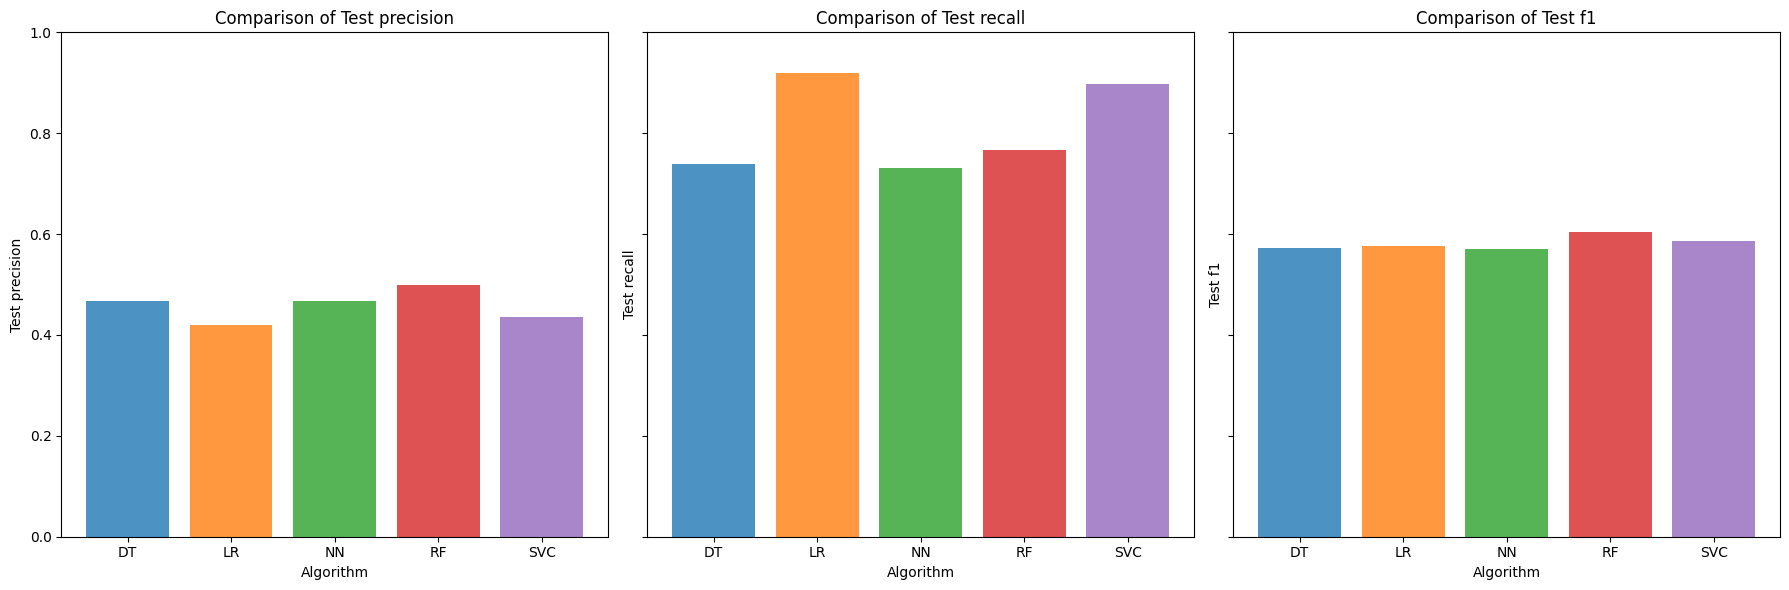

In [37]:
classify.plot_test_metric_comp()